• Principal Component Analysis (PCA) is a dimensionality reduction method, often used to create visualizations of high-dimensional data such as gene expression datasets with thousands of genes. It projects the data into a low-dimensional space while minimizing the sum of squared distances from the original data points to their projections. This is equivalent to maximizing the covariance matrix of the projected data.

• Let $X$ be some $p×N$ gene expression matrix with $p$ genes and $N$ samples. PCA projects the $p$-dimensional data into a $q$-dimensional subspace ($q≤p$).

• Let $C$ be the covariance matrix of $X$. $C$ is a non-negative definite matrix. It has the eigen decomposition $𝐶 = 𝑉𝑆𝑉^{−1}$, where $S$ is the diagonal matrix with non-negative eigenvalues ($σ_{i}, i=1, …, p$) of $C$ in decreasing order and the columns of matrix $V$ are the eigenvectors of $C$.

• If we pick the first $q$ principal components, we have projected the $p$-dimensional data matrix $X$ into a $q$-dimensional sub-space. The fraction of the original variance kept by the projected data will be
$$ R^2 = \frac{\sum_{i=1}^q \sigma_i}{\sum_{j=1}^p \sigma_j} \tag{1}$$


In [1]:
# load the provided preprocessed gene expression matrix of 18 normal and 27 clear cell renal cell carcinoma samples
# the raw data is available from the Gene Expression Omnibus (GEO) repository under accession number GSE15641
rm(list=ls())
load("GeneExpressionData.RData")
ls() # check what data objects were loaded to workspace

[1] "class.labels" "exp.matrix"

In [2]:
# check what classes (groups) are there and how many samples in each
table(class.labels)

class.labels
clearcellRCC       normal 
          27           18 

In [3]:
# change the order of columns (samples) to ensure that normal samples are listed first, followed by clear cell renal cell carcinoma samples 
exp.matrix <- exp.matrix[, c(which(class.labels=="normal"), which(class.labels=="clearcellRCC"))]

In [4]:
# Command 'prcomp' will return an error if any feature (gene) has zero variance (or standard deviation)
# Checking for and discarding such features is recommended 
std <- apply(exp.matrix, 1, sd)
if(any(std < 0.001))
	{
	ind <- which(std < 0.001)
	exp.matrix <- exp.matrix[-ind,] 
	}
pca <- prcomp(t(exp.matrix), scale=T)
names(pca)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [5]:
# calculate the proportion of data variance explained by the first 3 principal components
a <- pca$sdev
pc1 <- a[1]^2/sum(a^2)
pc2 <- a[2]^2/sum(a^2)
pc3 <- a[3]^2/sum(a^2)

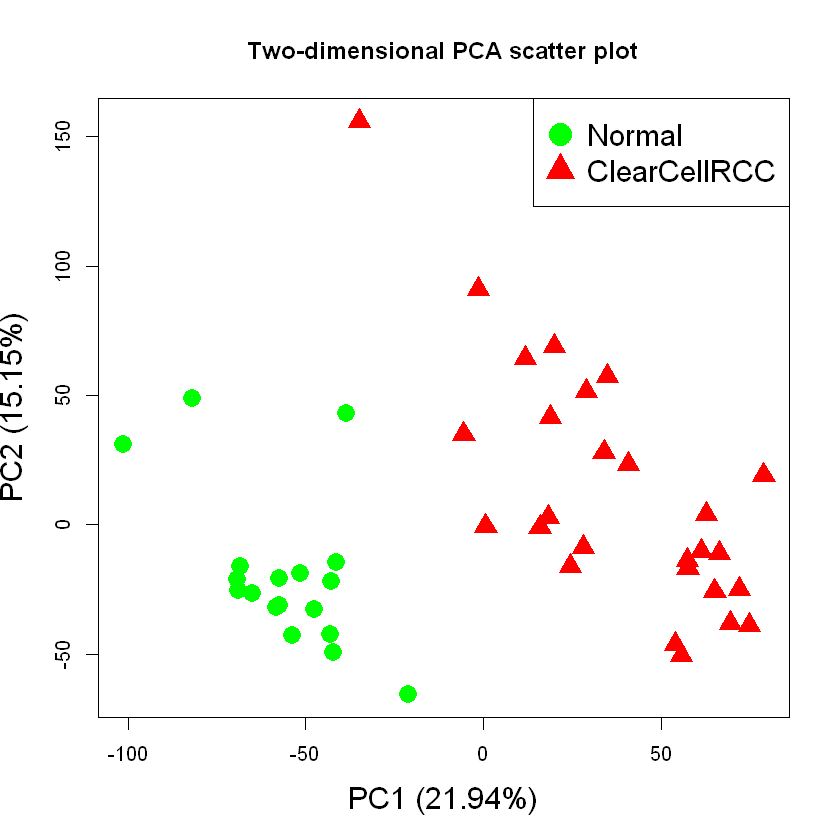

In [6]:
# generate a 2-dimensional scatter plot 
colors <- ifelse(class.labels=="normal", "green", "red")
symbols <- ifelse(class.labels=="normal", 16, 17)
plot(pca$x[,1:2], pch=symbols, cex=2, cex.lab=1.5, col=colors, main="Two-dimensional PCA scatter plot",
xlab=paste("PC1 (", round(100*pc1, 2), "%)", sep=""), 
ylab=paste("PC2 (", round(100*pc2, 2), "%)", sep=""))
legend("topright", legend=c("Normal","ClearCellRCC"), col=c("green","red"), pch=c(16,17), cex=1.5, pt.cex=2.5)

**Observation:** The PCA scatter plot shows that the two classes (Normal and ClearCellRCC) are well-clustered

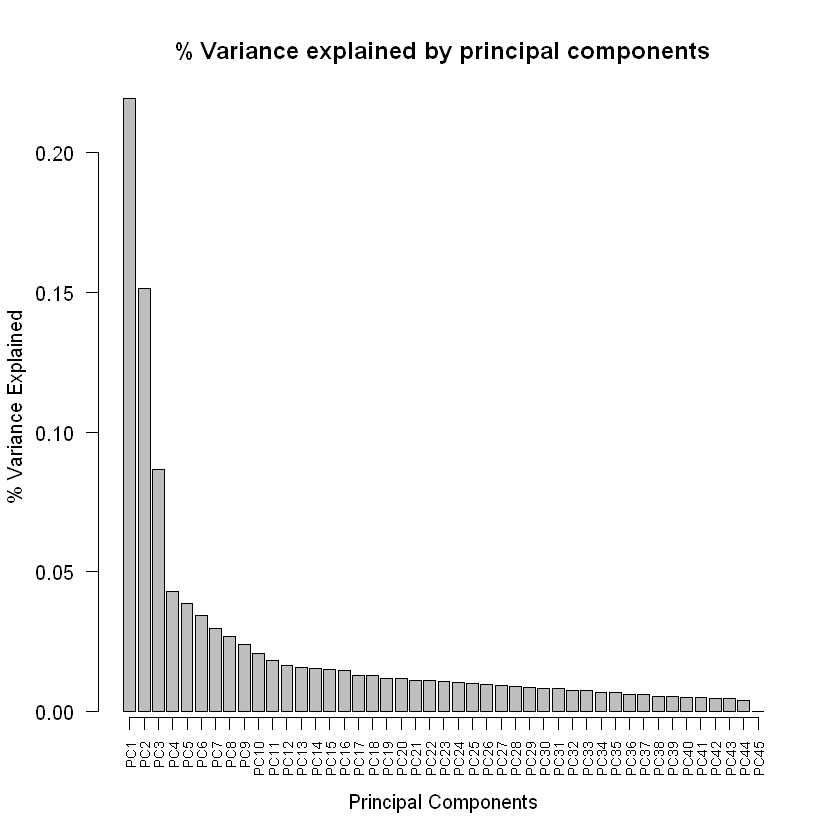

In [7]:
# to show the proportion of variance explained by each principal component
pos <- barplot((a^2/sum(a^2)), plot=FALSE, main="% Variance explained by principal components", xlab="Principal Components", ylab="% Variance Explained", names.arg=paste("PC", c(1:45), sep=""))
barplot(a^2/sum(a^2), axes=FALSE, main="% Variance explained by principal components", xlab="Principal Components", ylab="% Variance Explained")
axis(side=1, las=2, at=pos, labels=paste("PC", c(1:45), sep=""), cex.axis=0.7)
axis(side=2, las=1, at=seq(0, max(a^2/sum(a^2)), by=0.05), cex.axis=1)

In [8]:
sessionInfo()

R version 4.4.2 (2024-10-31 ucrt)
Platform: x86_64-w64-mingw32/x64
Running under: Windows 11 x64 (build 22631)

Matrix products: default


locale:
[1] LC_COLLATE=English_United States.utf8 
[2] LC_CTYPE=English_United States.utf8   
[3] LC_MONETARY=English_United States.utf8
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.utf8    

time zone: America/Chicago
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] digest_0.6.37     IRdisplay_1.1     base64enc_0.1-3   fastmap_1.2.0    
 [5] glue_1.8.0        htmltools_0.5.8.1 repr_1.1.7        lifecycle_1.0.4  
 [9] cli_3.6.4         vctrs_0.6.5       pbdZMQ_0.3-13     compiler_4.4.2   
[13] tools_4.4.2       evaluate_1.0.3    pillar_1.10.1     rlang_1.1.5      
[17] jsonlite_1.9.1    crayon_1.5.3      IRkernel_1.3.2    uuid_1.2-1       